In [80]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas.testing as tm
from scipy import stats
import seaborn as sns

# Make plots larger
plt.rcParams['figure.figsize'] = (35, 9)

In [82]:
Goal4 = pd.read_csv('C://Users/yare01/Downloads/config_files/Goal4.csv')

C:\Users\yare01\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1,9,16,17,19,21,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Filter and work on the country of focus

#### These countries can be spelt differently sometimes in the dataset (Example Congo Dem. Rep. can also be spelt out as Congo Democratic Republic)

In [83]:
#Country of focus
countries = ['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Belarus', 'Belize', 'Benin', 'Bhutan','Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo','Congo, Democratic Republic', 'Costa Rica', 'Croatia', "Côte d'Ivoire", 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Fiji', 'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'India', 'Indonesia', 'Iran (Islamic Republic of)', 'Iraq', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kosovo', 'Kyrgyzstan', "Lao People's Democratic Republic", 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Marshall Islands', 'Mauritania', 'Mauritius', 'Mexico', 'Micronesia (Federated States of)','Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal', 'Nicaragua', 'Niger', 'Nigeria', 'North Macedonia', 'Pakistan', 'Palau', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Romania', 'Russian Federation', 'Rwanda', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa', 'Sao Tome and Principe', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Solomon Islands', 'Somalia', 'South Africa', 'South Sudan', 'Sri Lanka', 'Sudan', 'Suriname', 'Syrian Arab Republic', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Togo', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Tuvalu', 'Uganda', 'Ukraine', 'United Republic of Tanzania', 'Uruguay', 'Uzbekistan', 'Vanuatu','Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe']

In [88]:
for i,j in enumerate(countries):
    print(i,j)

0 Afghanistan
1 Albania
2 Algeria
3 Angola
4 Antigua and Barbuda
5 Argentina
6 Armenia
7 Azerbaijan
8 Bangladesh
9 Belarus
10 Belize
11 Benin
12 Bhutan
13 Bolivia
14 Bosnia and Herzegovina
15 Botswana
16 Brazil
17 Bulgaria
18 Burkina Faso
19 Burundi
20 Cabo Verde
21 Cambodia
22 Cameroon
23 Central African Republic
24 Chad
25 Chile
26 China
27 Colombia
28 Comoros
29 Congo
30 Congo, Democratic Republic
31 Costa Rica
32 Croatia
33 Côte d'Ivoire
34 Djibouti
35 Dominica
36 Dominican Republic
37 Ecuador
38 Egypt
39 El Salvador
40 Equatorial Guinea
41 Eritrea
42 Eswatini
43 Ethiopia
44 Fiji
45 Gabon
46 Gambia
47 Georgia
48 Ghana
49 Grenada
50 Guatemala
51 Guinea
52 Guinea-Bissau
53 Guyana
54 Haiti
55 Honduras
56 India
57 Indonesia
58 Iran (Islamic Republic of)
59 Iraq
60 Jamaica
61 Jordan
62 Kazakhstan
63 Kenya
64 Kiribati
65 Kosovo
66 Kyrgyzstan
67 Lao People's Democratic Republic
68 Lebanon
69 Lesotho
70 Liberia
71 Libya
72 Madagascar
73 Malawi
74 Malaysia
75 Maldives
76 Mali
77 Marshall Is

In [60]:
Goal4.GeoAreaName.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Azerbaijan', 'Argentina',
       'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Armenia',
       'Belgium', 'Bhutan', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Belize', 'Brunei Darussalam', 'Bulgaria', 'Burundi',
       'Belarus', 'Cambodia', 'Cameroon', 'Canada', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo',
       'Democratic Republic of the Congo', 'Costa Rica', 'Croatia',
       'Cuba', 'Cyprus', 'Czechia', 'Benin', 'Denmark',
       'Dominican Republic', 'Ecuador', 'El Salvador', 'Estonia',
       'Finland', 'France', 'Gabon', 'Georgia', 'Gambia',
       'State of Palestine', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Honduras', 'China, Hong Kong Special Administrative Region',
       'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran (Islamic Republic of)', 'Ireland', 'Israel', 'Italy',
       "Côte d'Ivoire", 'Japan', 'Kazakhstan', 'Jordan', 'Kenya',
       "Democratic People's Republi

In [84]:
len(Goal4.GeoAreaName.unique())

254

In [85]:
list1=set(countries)
list2=set(Goal4.GeoAreaName)
list1_as_set=set(list1)
intersection=list1_as_set.intersection(list2)
intersection_as_list=list(intersection)
print(intersection_as_list)

['Indonesia', 'Cameroon', 'Mauritania', 'Nepal', 'Turkmenistan', 'Madagascar', 'North Macedonia', 'Saint Vincent and the Grenadines', 'Mali', 'Antigua and Barbuda', 'Comoros', "Côte d'Ivoire", 'Niger', 'Mexico', 'Paraguay', 'Gabon', 'Botswana', 'Sao Tome and Principe', 'Kiribati', 'Solomon Islands', 'Jordan', 'Papua New Guinea', 'Saint Lucia', 'Djibouti', 'Honduras', 'Bulgaria', 'Dominica', 'Eswatini', 'Costa Rica', 'Seychelles', 'Argentina', 'Nicaragua', 'Grenada', 'Panama', 'Pakistan', 'Egypt', 'Suriname', 'Maldives', 'Micronesia (Federated States of)', 'Albania', 'Kyrgyzstan', 'Burkina Faso', 'Sudan', 'Belarus', 'Guatemala', 'Mongolia', 'Yemen', 'Eritrea', 'Bhutan', 'Namibia', 'Uruguay', 'Congo', 'Bangladesh', 'Kosovo', 'Ghana', 'Morocco', 'Mozambique', 'Tuvalu', 'Ukraine', 'Iraq', "Lao People's Democratic Republic", 'Lebanon', 'Somalia', 'Timor-Leste', 'Angola', 'Chile', 'Colombia', 'Malawi', 'Guyana', 'Togo', 'Algeria', 'Rwanda', 'Samoa', 'Lesotho', 'Palau', 'Central African Repub

In [86]:
notcommoncountries=list1-list2
print(notcommoncountries)

{'Venezuela', 'Congo, Democratic Republic', 'Vietnam', 'Bolivia', 'Moldova'}


In [89]:
Goal4.head()

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail,...,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
0,4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,4,Afghanistan,2013,11.0,2013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,4,Afghanistan,2013,13.0,2013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,4,Afghanistan,2016,21.5,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,4,Afghanistan,2016,22.5,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,4,Afghanistan,2016,22.0,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Time_Detail', ylabel='Value'>

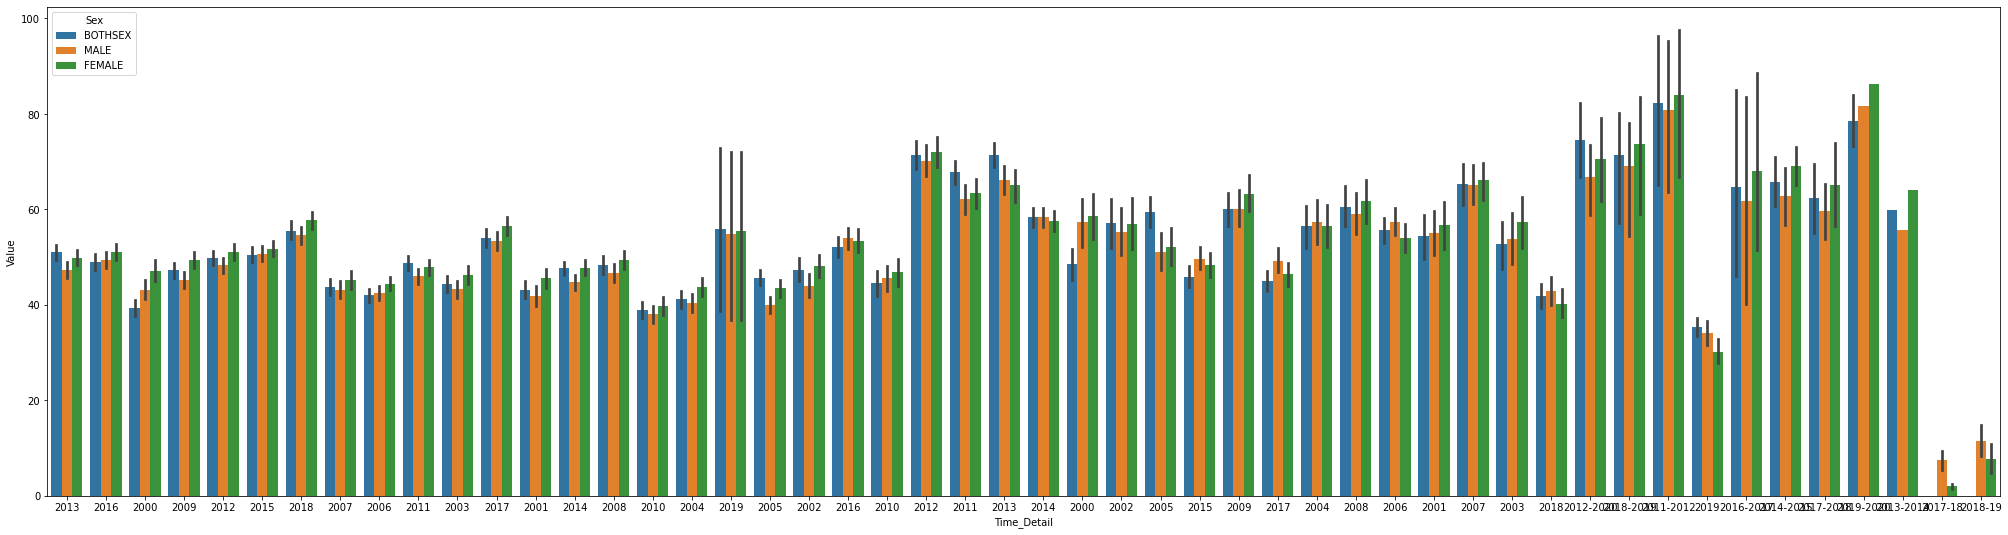

In [90]:
sns.barplot(x="Time_Detail", y="Value", hue="Sex", data=Goal4)

In [91]:
Goal4 = Goal4.loc[:, ~Goal4.columns.str.contains('^Unnamed')]

In [92]:
Goal4

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail,...,FootNote,Age,Education level,Location,Nature,Quantile,Reporting Type,Sex,Type of skill,Units
0,4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,4,Afghanistan,2013,11.00000,2013,...,NaN,NaN,PRIMAR,NaN,C,NaN,G,BOTHSEX,SKILL_MATH,PERCENT
1,4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,4,Afghanistan,2013,13.00000,2013,...,NaN,NaN,PRIMAR,NaN,C,NaN,G,BOTHSEX,SKILL_READ,PERCENT
2,4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,4,Afghanistan,2016,21.50000,2016,...,NaN,NaN,GRAD23,NaN,C,NaN,G,MALE,SKILL_READ,PERCENT
3,4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,4,Afghanistan,2016,22.50000,2016,...,NaN,NaN,GRAD23,NaN,C,NaN,G,FEMALE,SKILL_READ,PERCENT
4,4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,4,Afghanistan,2016,22.00000,2016,...,NaN,NaN,GRAD23,NaN,C,NaN,G,BOTHSEX,SKILL_READ,PERCENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191757,4,4.c,4.c.1,SE_TRA_GRDL,Proportion of teachers who have received at le...,894,Zambia,2012,95.54508,2012,...,NaN,NaN,LOWSEC,NaN,E,NaN,G,FEMALE,NaN,PERCENT
191758,4,4.c,4.c.1,SE_TRA_GRDL,Proportion of teachers who have received at le...,894,Zambia,2012,89.71963,2012,...,NaN,NaN,LOWSEC,NaN,E,NaN,G,MALE,NaN,PERCENT
191759,4,4.c,4.c.1,SE_TRA_GRDL,Proportion of teachers who have received at le...,894,Zambia,2017,100.00000,2017,...,NaN,NaN,PRIMAR,NaN,C,NaN,G,MALE,NaN,PERCENT
191760,4,4.c,4.c.1,SE_TRA_GRDL,Proportion of teachers who have received at le...,894,Zambia,2017,98.75030,2017,...,NaN,NaN,PRIMAR,NaN,C,NaN,G,BOTHSEX,NaN,PERCENT


In [93]:
Goal4.drop(['TimeCoverage','UpperBound','LowerBound','Reporting Type','GeoInfoUrl','Goal','BasePeriod','FootNote'], axis=1, inplace=True)

In [37]:
Goal4

,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail,BasePeriod,Source,FootNote,Age,Education level,Location,Nature,Quantile,Sex,Type of skill,Units
0,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,4,Afghanistan,2013,11.00000,2013,NaN,National Learning Assessment (NLA): Monitoring...,NaN,NaN,PRIMAR,NaN,C,NaN,BOTHSEX,SKILL_MATH,PERCENT
1,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,4,Afghanistan,2013,13.00000,2013,NaN,National Learning Assessment (NLA): Monitoring...,NaN,NaN,PRIMAR,NaN,C,NaN,BOTHSEX,SKILL_READ,PERCENT
2,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,4,Afghanistan,2016,21.50000,2016,NaN,National Learning Assessment (NLA): Monitoring...,NaN,NaN,GRAD23,NaN,C,NaN,MALE,SKILL_READ,PERCENT
3,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,4,Afghanistan,2016,22.50000,2016,NaN,National Learning Assessment (NLA): Monitoring...,NaN,NaN,GRAD23,NaN,C,NaN,FEMALE,SKILL_READ,PERCENT
4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,4,Afghanistan,2016,22.00000,2016,NaN,National Learning Assessment (NLA): Monitoring...,NaN,NaN,GRAD23,NaN,C,NaN,BOTHSEX,SKILL_READ,PERCENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191757,4.c,4.c.1,SE_TRA_GRDL,Proportion of teachers who have received at le...,894,Zambia,2012,95.54508,2012,NaN,UIS,NaN,NaN,LOWSEC,NaN,E,NaN,FEMALE,NaN,PERCENT
191758,4.c,4.c.1,SE_TRA_GRDL,Proportion of teachers who have received at le...,894,Zambia,2012,89.71963,2012,NaN,UIS,NaN,NaN,LOWSEC,NaN,E,NaN,MALE,NaN,PERCENT
191759,4.c,4.c.1,SE_TRA_GRDL,Proportion of teachers who have received at le...,894,Zambia,2017,100.00000,2017,NaN,UIS,NaN,NaN,PRIMAR,NaN,C,NaN,MALE,NaN,PERCENT
191760,4.c,4.c.1,SE_TRA_GRDL,Proportion of teachers who have received at le...,894,Zambia,2017,98.75030,2017,NaN,UIS,NaN,NaN,PRIMAR,NaN,C,NaN,BOTHSEX,NaN,PERCENT


<AxesSubplot:xlabel='Quantile', ylabel='Value'>

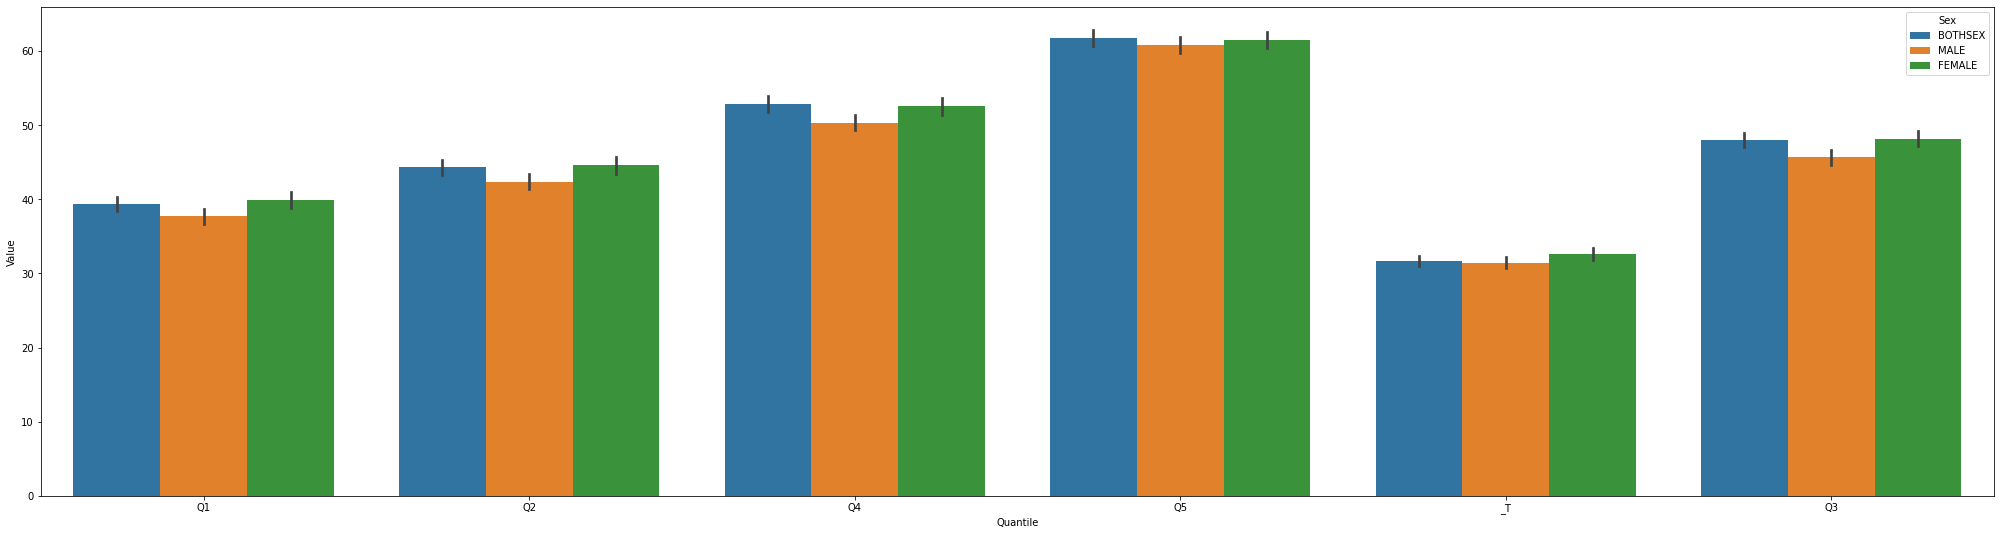

In [94]:
sns.barplot(x="Quantile", y="Value", hue="Sex", data=Goal4)

<AxesSubplot:xlabel='GeoAreaCode', ylabel='Value'>

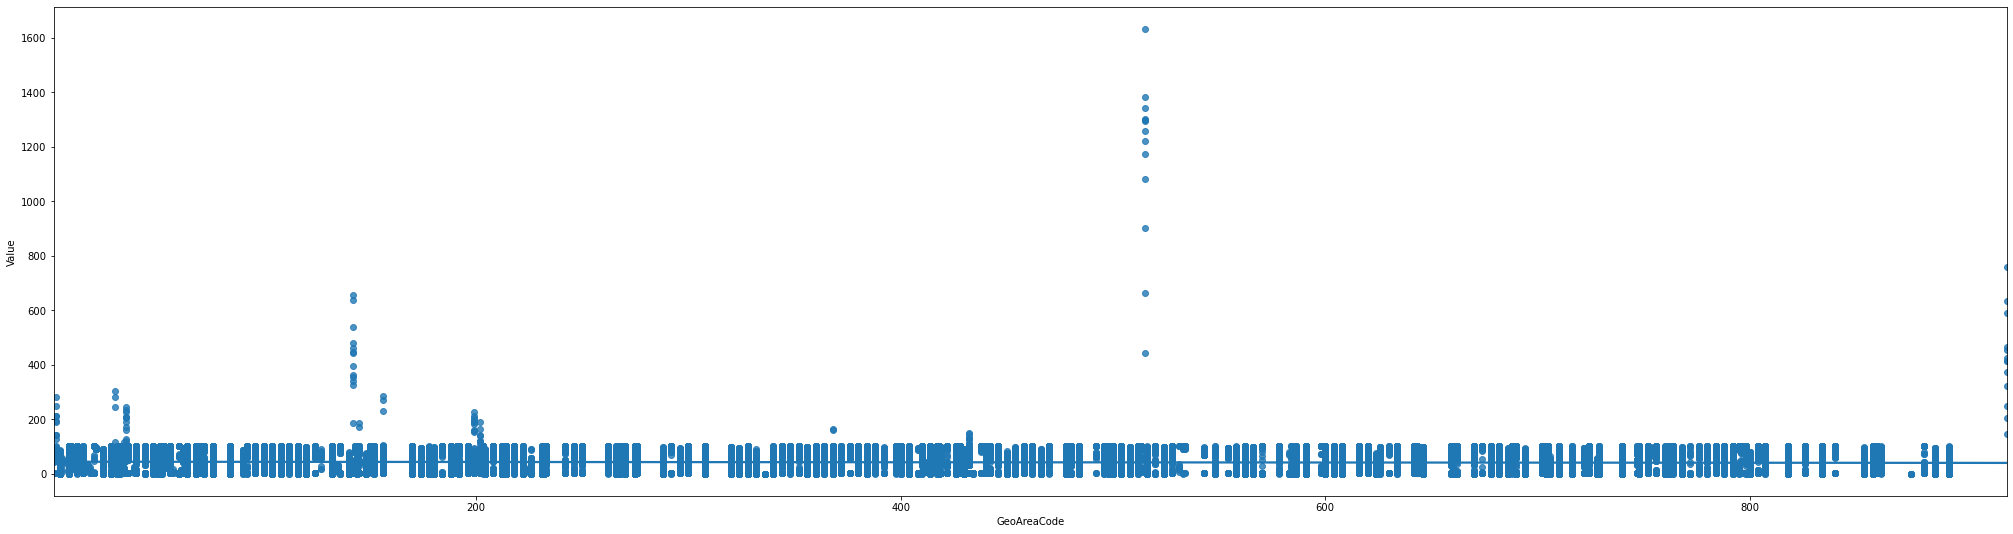

In [32]:
sns.regplot(x="GeoAreaCode", y="Value", data=Goal4)

In [38]:
Goal4.shape

(191762, 20)

In [39]:
Goal4.info

<bound method DataFrame.info of        Target Indicator   SeriesCode  \
0         4.1     4.1.1  SE_TOT_PRFL   
1         4.1     4.1.1  SE_TOT_PRFL   
2         4.1     4.1.1  SE_TOT_PRFL   
3         4.1     4.1.1  SE_TOT_PRFL   
4         4.1     4.1.1  SE_TOT_PRFL   
...       ...       ...          ...   
191757    4.c     4.c.1  SE_TRA_GRDL   
191758    4.c     4.c.1  SE_TRA_GRDL   
191759    4.c     4.c.1  SE_TRA_GRDL   
191760    4.c     4.c.1  SE_TRA_GRDL   
191761    4.c     4.c.1  SE_TRA_GRDL   

                                        SeriesDescription  GeoAreaCode  \
0       Proportion of children and young people achiev...            4   
1       Proportion of children and young people achiev...            4   
2       Proportion of children and young people achiev...            4   
3       Proportion of children and young people achiev...            4   
4       Proportion of children and young people achiev...            4   
...                                        

In [40]:
Goal4.describe()

,GeoAreaCode,TimePeriod,Value,BasePeriod
count,191762.000000,191762.000000,179570.000000,2276.0
mean,396.544002,2010.212284,41.595042,2018.0
std,250.320400,5.169051,41.230603,0.0
min,1.000000,2000.000000,0.000000,2018.0
25%,188.000000,2006.000000,1.001600,2018.0
50%,372.000000,2011.000000,34.134145,2018.0
75%,600.000000,2015.000000,83.482727,2018.0
max,921.000000,2020.000000,1632.065770,2018.0


In [95]:
Goal4.isnull().sum()

Target                    0
Indicator                 0
SeriesCode                0
SeriesDescription         0
GeoAreaCode               0
GeoAreaName               0
TimePeriod                0
Value                 12192
Time_Detail               0
Source                    0
Age                  191281
Education level       17879
Location              78911
Nature                    0
Quantile              55387
Sex                   48829
Type of skill        175898
Units                     0
dtype: int64

<AxesSubplot:>

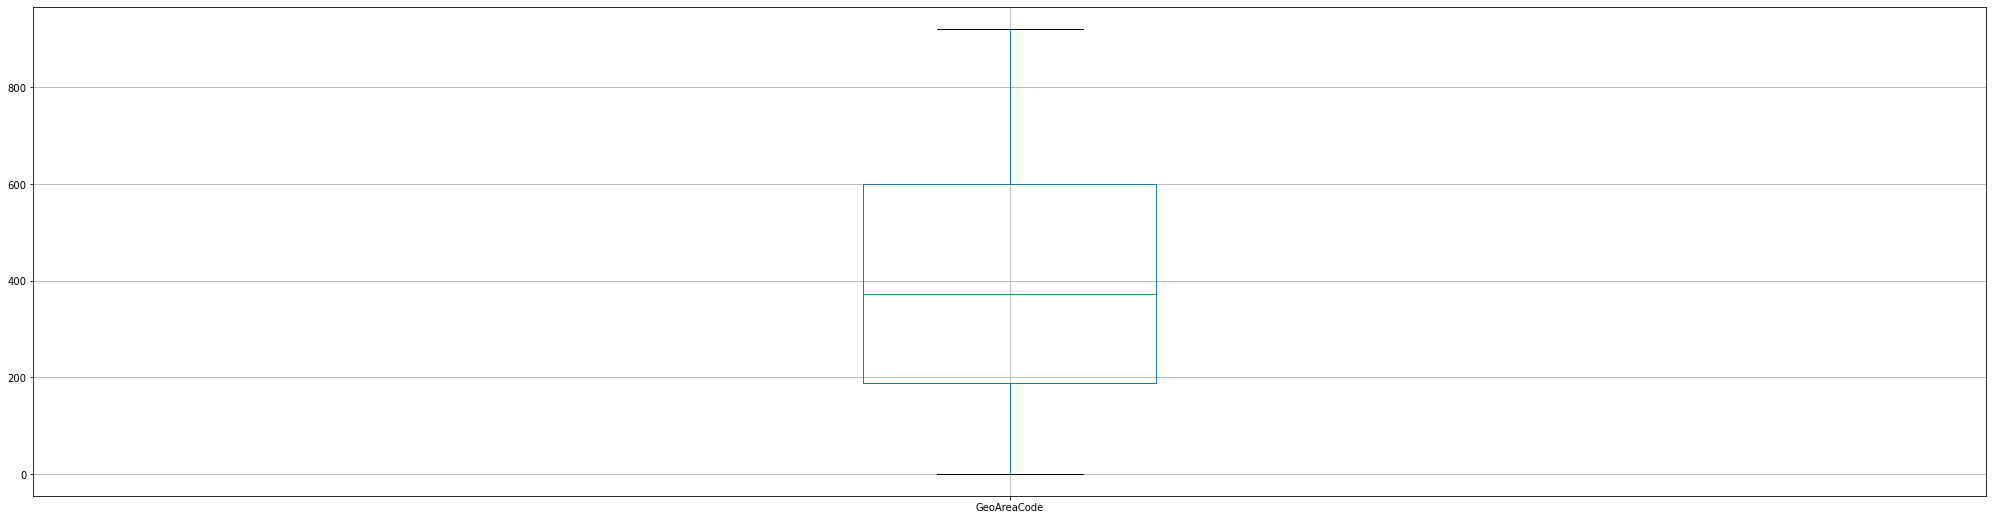

In [96]:
Goal4.boxplot(column=['GeoAreaCode'])

In [57]:
goal4_median_dic={}
indicator_ls=indicator_median.Indicator.tolist()
value_list=indicator_median.Value.tolist()
for i in range(0,11):
    goal4_median_dic[indicator_ls[i]]=value_list[i]

In [52]:
Goal4['Value']=Goal4.lambda(x: )

,Indicator,GeoAreaCode,TimePeriod,Value
0,4.1.1,414,2011,69.549308
1,4.1.2,360,2010,69.190000
2,4.2.1,422,2017,76.550000
3,4.2.2,384,2010,85.988140
4,4.3.1,372,2011,4.814639
5,4.4.1,417,2017,31.718140
6,4.5.1,364,2010,0.937550
7,4.6.1,398,2012,81.444540
8,4.a.1,376,2014,100.000000
9,4.b.1,384,2012,2.979025


In [97]:
indicator_median=Goal4.groupby('Indicator').agg('median').reset_index(drop=False)

goal4_median_dic={}
indicator_ls=indicator_median.Indicator.tolist()
value_list=indicator_median.Value.tolist()
for i in range(0,11):
    goal4_median_dic[indicator_ls[i]]=value_list[i]

Goal4['Value'].map(goal4_median_dic).fillna(Goal4['Value'])


0          11.00000
1          13.00000
2          21.50000
3          22.50000
4          22.00000
            ...    
191757     95.54508
191758     89.71963
191759    100.00000
191760     98.75030
191761     97.52328
Name: Value, Length: 191762, dtype: float64

array([<AxesSubplot:ylabel='GeoAreaCode'>,
       <AxesSubplot:ylabel='TimePeriod'>, <AxesSubplot:ylabel='Value'>],
      dtype=object)

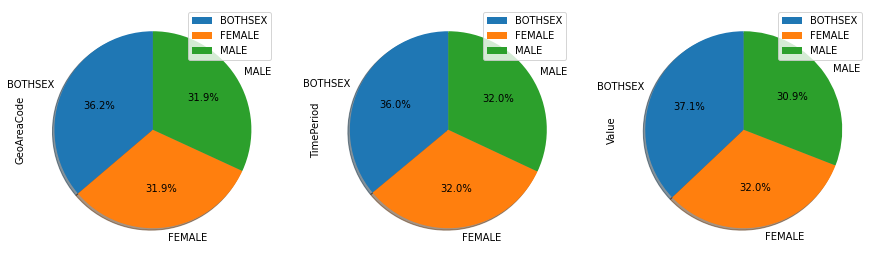

In [118]:
Goal4.groupby(['Sex']).sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,
figsize=(15,10), autopct='%1.1f%%')

C:\Users\yare01\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GeoAreaCode', ylabel='Density'>

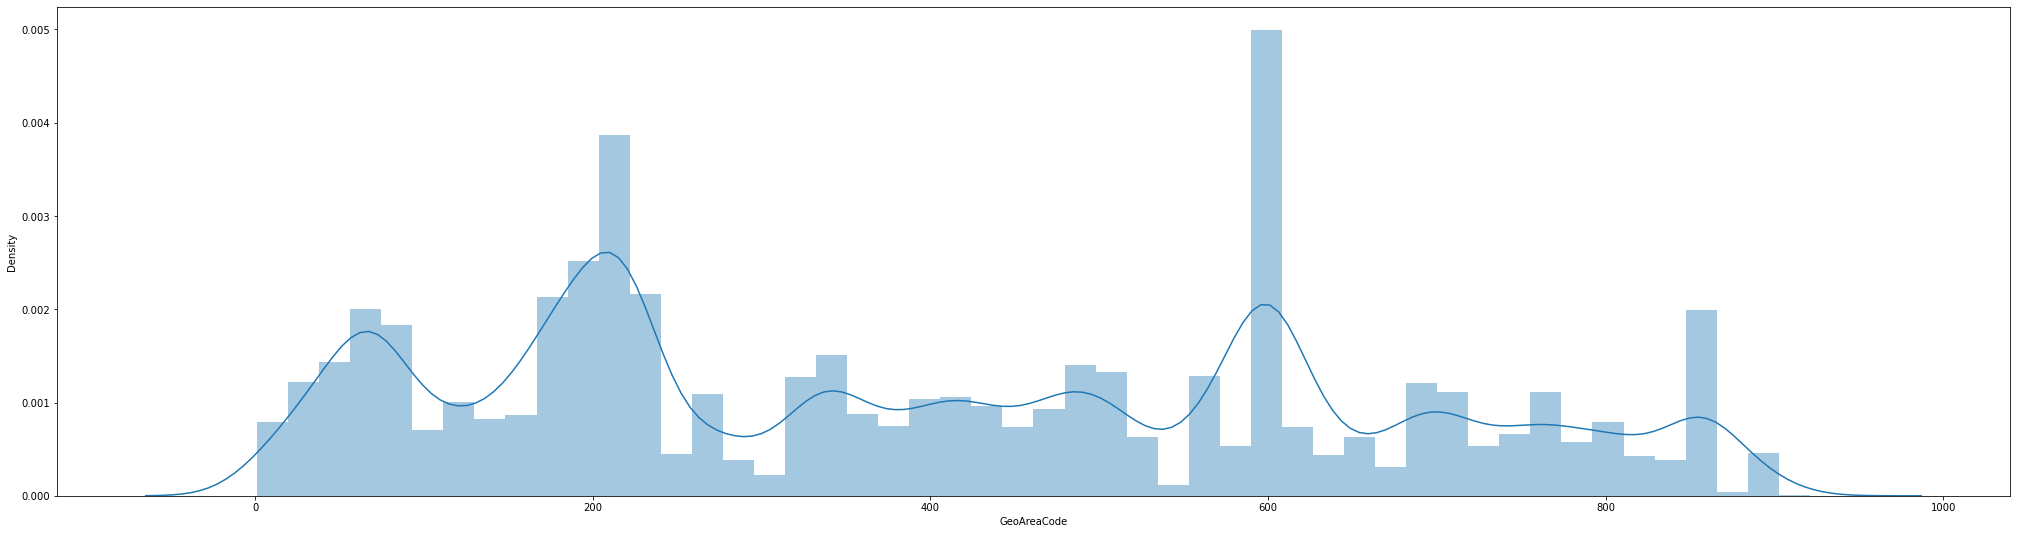

In [121]:
sns.distplot(Goal4['GeoAreaCode'])

<AxesSubplot:xlabel='TimePeriod', ylabel='Value'>

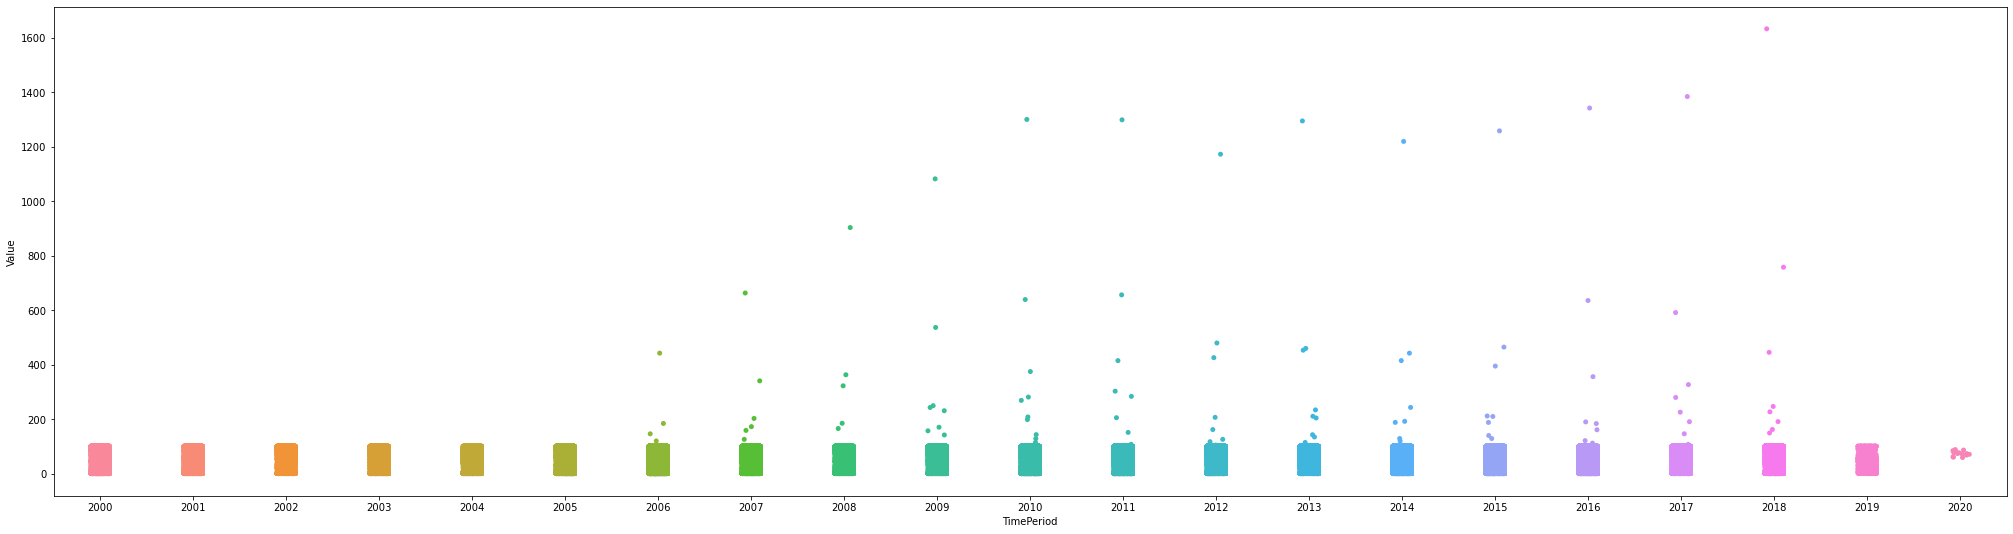

In [128]:
sns.stripplot(x="TimePeriod", y="Value", data=Goal4)

C:\Users\yare01\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


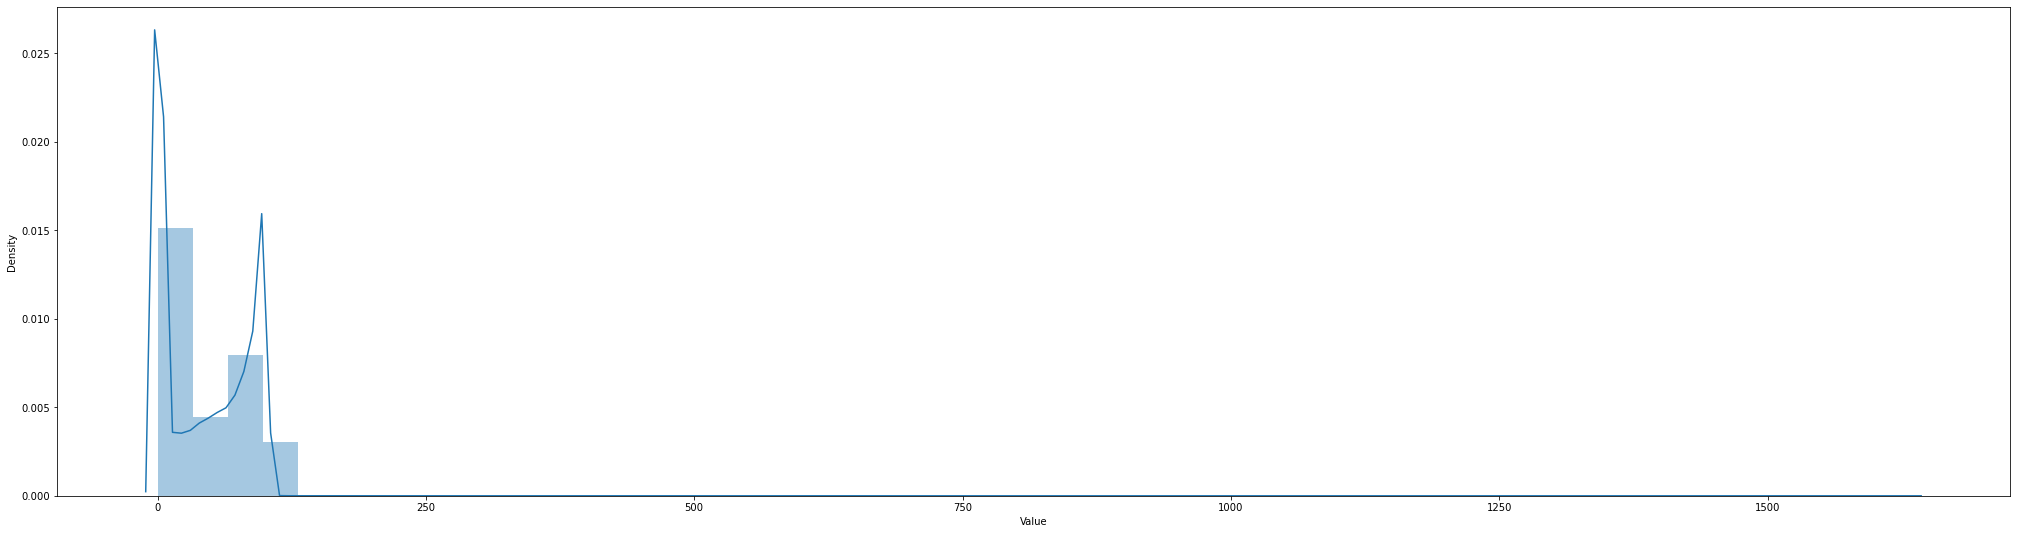

In [130]:
sns_plot = sns.distplot(Goal4["Value"])

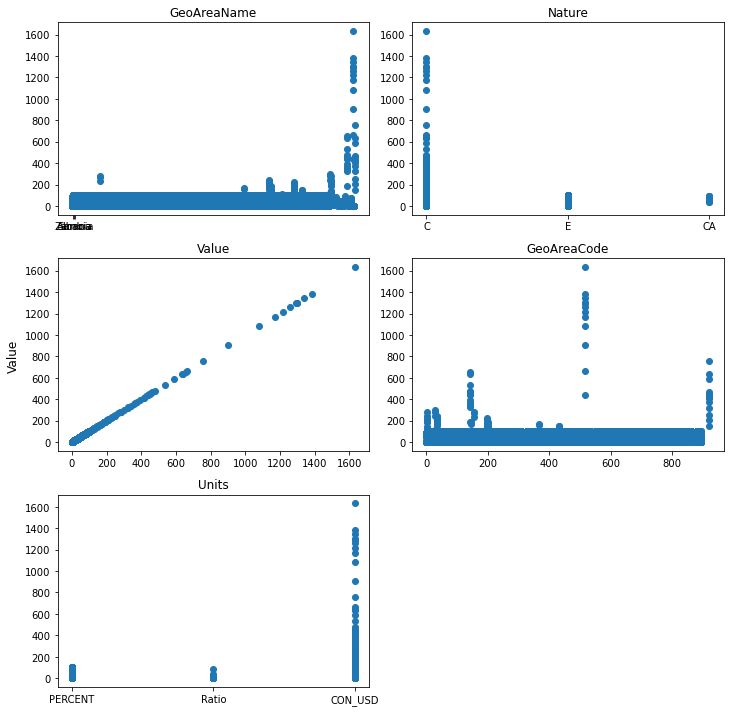

In [136]:
f,axarr = plt.subplots(3,2, figsize=(10,10))
mpgval = Goal4.Value.values
axarr[0,0].scatter(Goal4.GeoAreaName.values, mpgval)
axarr[0,0].set_title('GeoAreaName')
axarr[0,1].scatter(Goal4.Nature.values, mpgval)
axarr[0,1].set_title('Nature')
axarr[1,0].scatter(Goal4.Value.values, mpgval)
axarr[1,0].set_title('Value')
axarr[1,1].scatter(Goal4.GeoAreaCode.values, mpgval)
axarr[1,1].set_title('GeoAreaCode')
axarr[2,0].scatter(Goal4.Units.values, mpgval)
axarr[2,0].set_title('Units')
axarr[0,0].set_xticks([1,2,3])
axarr[0,0].set_xticklabels(["Zambia","Samoa","Albania"])
# Remove the blank plot from the subplots
axarr[2,1].axis("off")
f.text(-0.01, 0.5, 'Value', va='center', rotation='vertical', fontsize = 12)
plt.tight_layout()
plt.show()